# Industry 4.0 의 중심, BigData

<div align='right'><font size=2 color='gray'>Data Processing Based Python @ <font color='blue'><a href='https://www.facebook.com/jskim.kr'>FB / jskim.kr</a></font>, [김진수](bigpycraft@gmail.com)</font></div>
<hr>

# Pandas Advanced 

> ### INDEX
> - Plotting (그래프)
> - Getting Data In / Out (데이터 입 / 출력)
> - Gotchas (잡았다!)

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

## 11. Plotting (그래프)

> - 데이터프레임에서 plot() 메소드는 라벨이 존재하는 모든 열을 그릴 때 편리합니다.

In [2]:
ts = pd.Series(np.random.randn(1000), index=pd.date_range('1/1/2020', periods=1000))
ts

2020-01-01    0.089377
2020-01-02   -0.967446
2020-01-03   -0.022171
2020-01-04    0.325075
2020-01-05   -0.439053
                ...   
2022-09-22    2.097149
2022-09-23   -1.982240
2022-09-24   -2.147457
2022-09-25    0.398986
2022-09-26    0.471984
Freq: D, Length: 1000, dtype: float64

In [3]:
# ts.info()

In [4]:
ts.head()

2020-01-01    0.089377
2020-01-02   -0.967446
2020-01-03   -0.022171
2020-01-04    0.325075
2020-01-05   -0.439053
Freq: D, dtype: float64

In [5]:
ts = ts.cumsum()
ts

2020-01-01     0.089377
2020-01-02    -0.878069
2020-01-03    -0.900240
2020-01-04    -0.575165
2020-01-05    -1.014217
                ...    
2022-09-22   -40.845220
2022-09-23   -42.827461
2022-09-24   -44.974917
2022-09-25   -44.575932
2022-09-26   -44.103948
Freq: D, Length: 1000, dtype: float64

<AxesSubplot:>

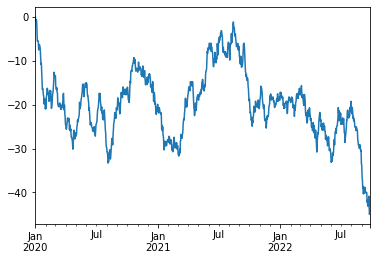

In [6]:
ts.plot()

In [7]:
df = pd.DataFrame(np.random.randn(1000, 4), index=ts.index,
                  columns=['A', 'B', 'C', 'D']) 
df

,A,B,C,D
2020-01-01,0.899481,1.713212,0.247332,-0.071985
2020-01-02,-0.524289,0.811343,-0.674466,0.712028
2020-01-03,1.306596,-0.672430,0.858209,1.794761
2020-01-04,1.131486,0.900494,0.957943,-0.728330
2020-01-05,0.097470,1.304631,0.837454,0.072701
...,...,...,...,...
2022-09-22,0.114409,0.713974,-0.841870,-0.851505
2022-09-23,-0.236201,1.024395,1.002989,0.915324
2022-09-24,-1.924957,-0.133886,-1.314723,-0.735635
2022-09-25,-0.026358,-0.214540,-0.353136,-0.209661


In [8]:
df = df.cumsum()
df

,A,B,C,D
2020-01-01,0.899481,1.713212,0.247332,-0.071985
2020-01-02,0.375191,2.524555,-0.427134,0.640042
2020-01-03,1.681787,1.852124,0.431075,2.434803
2020-01-04,2.813274,2.752618,1.389018,1.706473
2020-01-05,2.910744,4.057249,2.226472,1.779174
...,...,...,...,...
2022-09-22,26.859413,-5.105419,-67.246402,3.601437
2022-09-23,26.623213,-4.081024,-66.243413,4.516761
2022-09-24,24.698256,-4.214910,-67.558137,3.781126
2022-09-25,24.671898,-4.429450,-67.911273,3.571465


<Figure size 432x288 with 0 Axes>

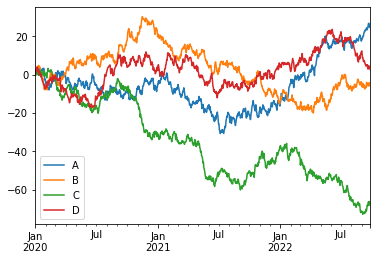

In [9]:
plt.figure()
df.plot()
plt.legend(loc='best')

## 12. Getting Data In / Out (데이터 입 / 출력)

> - 파일 저장
> - 파일 로딩

In [10]:
df

,A,B,C,D
2020-01-01,0.899481,1.713212,0.247332,-0.071985
2020-01-02,0.375191,2.524555,-0.427134,0.640042
2020-01-03,1.681787,1.852124,0.431075,2.434803
2020-01-04,2.813274,2.752618,1.389018,1.706473
2020-01-05,2.910744,4.057249,2.226472,1.779174
...,...,...,...,...
2022-09-22,26.859413,-5.105419,-67.246402,3.601437
2022-09-23,26.623213,-4.081024,-66.243413,4.516761
2022-09-24,24.698256,-4.214910,-67.558137,3.781126
2022-09-25,24.671898,-4.429450,-67.911273,3.571465


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1000 entries, 2020-01-01 to 2022-09-26
Freq: D
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   A       1000 non-null   float64
 1   B       1000 non-null   float64
 2   C       1000 non-null   float64
 3   D       1000 non-null   float64
dtypes: float64(4)
memory usage: 39.1 KB


- csv 파일

In [12]:
df.to_csv('data/foo.csv')

In [13]:
csv_df = pd.read_csv('data/foo.csv')

In [14]:
csv_df.head(10)

,Unnamed: 0,A,B,C,D
0,2020-01-01,0.899481,1.713212,0.247332,-0.071985
1,2020-01-02,0.375191,2.524555,-0.427134,0.640042
2,2020-01-03,1.681787,1.852124,0.431075,2.434803
3,2020-01-04,2.813274,2.752618,1.389018,1.706473
4,2020-01-05,2.910744,4.057249,2.226472,1.779174
5,2020-01-06,2.133347,4.165244,2.162834,3.518348
6,2020-01-07,2.765427,3.535533,1.110398,3.986160
7,2020-01-08,2.280444,2.253152,1.440918,2.725568
8,2020-01-09,1.957516,3.723577,-0.057035,3.020830
9,2020-01-10,1.924777,4.828461,0.778610,1.848091


- HDF5 파일

In [15]:
df.to_hdf('data/foo.h5','df')

In [16]:
h5_df = pd.read_hdf('data/foo.h5','df')

In [17]:
h5_df.head()

,A,B,C,D
2020-01-01,0.899481,1.713212,0.247332,-0.071985
2020-01-02,0.375191,2.524555,-0.427134,0.640042
2020-01-03,1.681787,1.852124,0.431075,2.434803
2020-01-04,2.813274,2.752618,1.389018,1.706473
2020-01-05,2.910744,4.057249,2.226472,1.779174


- Excel 파일

In [18]:
df.to_excel('data/foo.xlsx', sheet_name='Sheet1')

In [19]:
excel_df = pd.read_excel('data/foo.xlsx', 'Sheet1', index_col=None, na_values=['NA'])

In [20]:
excel_df.head()

,Unnamed: 0,A,B,C,D
0,2020-01-01,0.899481,1.713212,0.247332,-0.071985
1,2020-01-02,0.375191,2.524555,-0.427134,0.640042
2,2020-01-03,1.681787,1.852124,0.431075,2.434803
3,2020-01-04,2.813274,2.752618,1.389018,1.706473
4,2020-01-05,2.910744,4.057249,2.226472,1.779174


In [21]:
df.head()

,A,B,C,D
2020-01-01,0.899481,1.713212,0.247332,-0.071985
2020-01-02,0.375191,2.524555,-0.427134,0.640042
2020-01-03,1.681787,1.852124,0.431075,2.434803
2020-01-04,2.813274,2.752618,1.389018,1.706473
2020-01-05,2.910744,4.057249,2.226472,1.779174


## 13. Gotchas (잡았다!)

```python

# 연산 수행 시 다음과 같은 예외 상황을 볼 수도 있습니다.
if pd.Series([False, True, False]):
    print("I was true")
   
---------------------------------------------------------------------------
ValueError                                Traceback (most recent call last)
Input In [30], in <cell line: 2>()
      1 # 연산 수행 시 다음과 같은 예외 상황을 볼 수도 있습니다.
----> 2 if pd.Series([False, True, False]):
      3     print("I was true")

File C:\Python\anaconda3\lib\site-packages\pandas\core\generic.py:1527, in NDFrame.__nonzero__(self)
   1525 @final
   1526 def __nonzero__(self):
-> 1527     raise ValueError(
   1528         f"The truth value of a {type(self).__name__} is ambiguous. "
   1529         "Use a.empty, a.bool(), a.item(), a.any() or a.all()."
   1530     )

ValueError: The truth value of a Series is ambiguous. Use a.empty, a.bool(), a.item(), a.any() or a.all().
    
   
```

In [22]:
# 이러한 경우에는 any(), all(), empty 등을 사용해서 무엇을 원하는지를 선택 (반영)해주어야 합니다.

if pd.Series([False, True, False])is not None:
      print("I was not None")

I was not None


In [23]:
bools = pd.Series([False, True, False])
bools

0    False
1     True
2    False
dtype: bool

In [24]:
bools.all()

False

In [25]:
bools.any()

True

In [26]:
bools.empty

False

In [27]:
bools = pd.Series([ True, True, True ])

In [28]:
bools.all(), bools.any(), bools.empty

(True, True, False)

In [29]:
bools = pd.Series([ False, False, False ])
bools.all(), bools.any(), bools.empty

(False, False, False)

<hr>
<marquee><font size=3 color='brown'>The BigpyCraft find the information to design valuable society with Technology & Craft.</font></marquee>
<div align='right'><font size=2 color='gray'> &lt; The End &gt; </font></div>